In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

from keras.models import load_model
from sklearn.preprocessing import StandardScaler

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load  dataset
dataset = pd.read_csv('/home_l/francovm/Projects/SSE/data/processed/input_data.csv', sep='\t', encoding='utf-8' ,index_col=0)

# split into input (X) and output (Y) variables

train_X = dataset.drop(columns=['Events'])

#one-hot encode target column
# train_Y = to_categorical(dataset.Events)

#Non categorical data
train_Y = dataset['Events'].values


#get number of columns in training data
n_cols = train_X.shape[1]


In [11]:
dataset.columns

Index(['x', 'error', 'n', 'n_error', 'u', 'u_error', 'Events'], dtype='object')

In [12]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
# (trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed)

In [13]:
X_train.head()

,x,error,n,n_error,u,u_error
144713,-41.89,2.17,90.36,2.41,-1.40,8.70
202164,34.15,1.84,-47.02,2.03,0.79,7.06
175681,-16.90,2.13,87.81,2.19,-22.43,8.51
73565,-3.32,2.21,118.61,2.15,-5.72,8.15
151695,47.91,1.31,-80.90,1.49,0.01,4.98


In [14]:
y_train.shape

# plt.plot(y_train)

(152570,)

In [15]:
#standardizing the input feature

# sc = StandardScaler()
# X = sc.fit_transform(X)
# X

In [32]:
model_2 = Sequential()

# add layers to model

# model.add(Dense(12, input_dim=7, activation='relu'))
#
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(10, activation='relu')) # extra layer
# model.add(Dense(2, activation='sigmoid'))

#add layers to model
model_2.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu'))
# model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

# Compile model

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
# model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model

# history = model.fit(train_X,train_Y, batch_size=100, epochs=10)

# history = model_2.fit(train_X,train_Y, epochs=40, validation_split=0.3)

history = model_2.fit(X_train,y_train, 
                      epochs=100, 
                      validation_split=0.3,
                      batch_size=64,
                      callbacks=[early_stopping_monitor])

# history = model_2.fit(train_X,train_Y, epochs=40, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor])

# model_2.fit(train_X,train_Y, epochs=10, validation_split=0.2, callbacks=[early_stopping_monitor])


Train on 106799 samples, validate on 45771 samples
Epoch 1/100
106799/106799 [==============================] - 13s 123us/step - loss: 0.2137 - acc: 0.9550 - val_loss: 0.1716 - val_acc: 0.9585
Epoch 2/100
106799/106799 [==============================] - 12s 116us/step - loss: 0.1783 - acc: 0.9558 - val_loss: 0.1673 - val_acc: 0.9585
Epoch 3/100
106799/106799 [==============================] - 12s 109us/step - loss: 0.1748 - acc: 0.9558 - val_loss: 0.1610 - val_acc: 0.9585
Epoch 4/100
106799/106799 [==============================] - 12s 114us/step - loss: 0.1734 - acc: 0.9558 - val_loss: 0.1603 - val_acc: 0.9585
Epoch 5/100
106799/106799 [==============================] - 12s 116us/step - loss: 0.1721 - acc: 0.9558 - val_loss: 0.1632 - val_acc: 0.9585
Epoch 6/100
106799/106799 [==============================] - 12s 115us/step - loss: 0.1707 - acc: 0.9558 - val_loss: 0.1600 - val_acc: 0.9585
Epoch 7/100
106799/106799 [==============================] - 13s 118us/step - loss: 0.1701 - acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


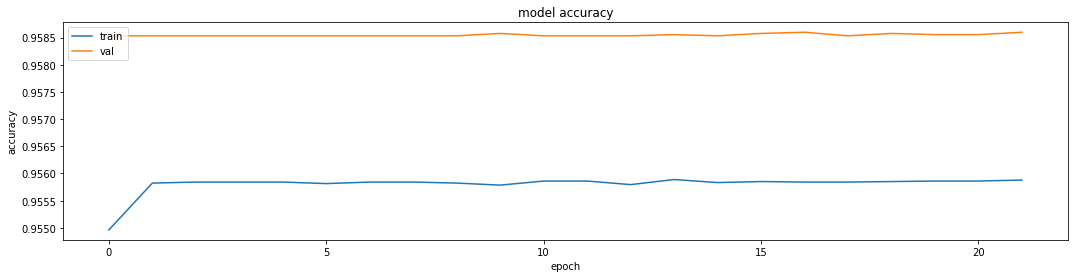

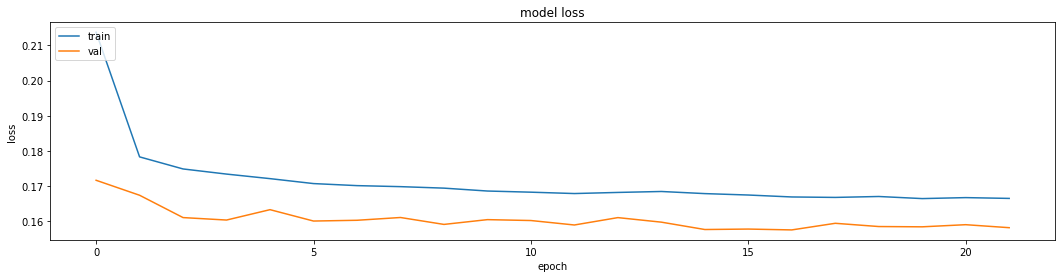

In [33]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
#  Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
 # Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [34]:
# def plot_history(histories, key='binary_crossentropy'):
#   plt.figure(figsize=(16,10))

#   for name, history in histories:
#     val = plt.plot(history.epoch, history.history['val_'+key],
#                    '--', label=name.title()+' Val')
#     plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
#              label=name.title()+' Train')

#   plt.xlabel('Epochs')
#   plt.ylabel(key.replace('_',' ').title())
#   plt.legend()

#   plt.xlim([-2,max(history.epoch)])

# plot_history([('baseline', history)])

In [35]:
# evaluate the model
scores = model_2.evaluate(X_test,y_test)
print((scores[1]*100))

75147/75147 [==============================] - 5s 66us/step
95.51678709768589


In [36]:
y_test

array([0., 0., 0., ..., 0., 1., 0.])

In [37]:
ynew = model_2.predict(X_test)

# ynew = np.argmax(ynew[:])

In [38]:
ynew.shape

(75147, 1)

In [39]:
ynew

array([[1.93447143e-01],
       [7.39657879e-02],
       [1.14142895e-05],
       ...,
       [2.90253870e-02],
       [2.44615644e-01],
       [3.84762622e-02]], dtype=float32)

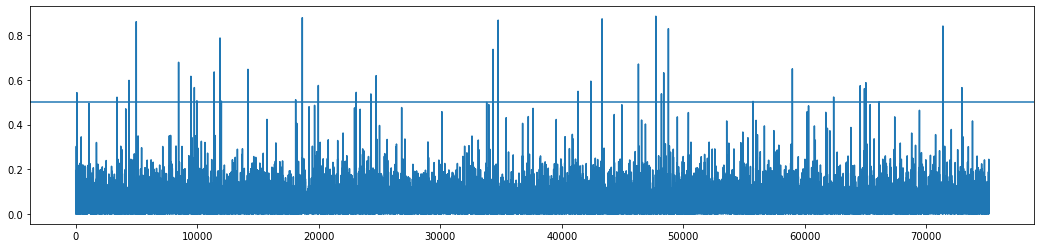

In [40]:
plt.plot(ynew) # plotting by columns
plt.axhline(0.5)
plt.show()

In [97]:
ynew

array([[2.0386726e-01],
       [6.5261841e-02],
       [1.4901161e-07],
       ...,
       [3.8702101e-02],
       [1.1518244e-01],
       [6.2616006e-02]], dtype=float32)

# Save the Model (Keras)

In [33]:
# save model and architecture to single file
# model_2.save("NN_SSE_95.h5")

In [ ]:
# # load model
# model = load_model('NN_SSE_95.h5')
# # summarize model.
# model.summary()



In [ ]:
# # load dataset
# dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # evaluate the model
# score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))